In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Load the data :

Read the “housing.csv” file from the folder into the program.
Print first few rows of this data.
Extract input (X) and output (Y) data from the dataset.

In [144]:
housingData = pd.read_csv('C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course3-Machine Learning/Projects/Projects for Submission/Project 4 - California Housing Price Prediction/housing.csv')
housingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [145]:
X = housingData.iloc[:, :-1].values
y = housingData.iloc[:, [-1]].values
#X = housingData.drop(['median_house_value'], axis=1)
#y = housingData.median_house_value

2. Handle missing values :

Fill the missing values with the mean of the respective column.

In [146]:
housingData.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [133]:
#housingData = housingData.dropna(how='any',axis=0) 

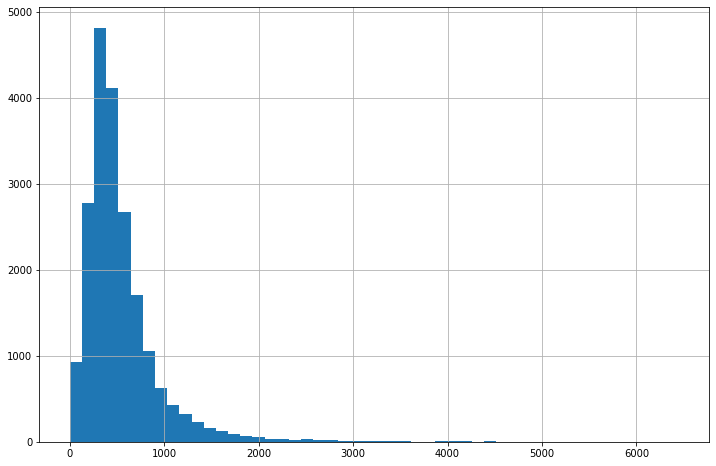

In [147]:
housingData.total_bedrooms.hist(figsize=(12,8),bins=50)
# distribution is right skewed so I will impute with median instead of mean

In [148]:
 #housingData['total_bedrooms'] = housingData['total_bedrooms'].fillna(housingData['total_bedrooms'].median())
from sklearn.impute import SimpleImputer
missingValueImputer = SimpleImputer()
X[:, :-1] = missingValueImputer.fit_transform(X[:, :-1])
y = missingValueImputer.fit_transform(y)
# housingData.isnull().sum()

In [149]:
#print(np.isnan(housingData.any()))
#print(np.isinf(housingData.any()))

3. Encode categorical data :

Convert categorical column in the dataset to numerical data.

In [150]:
housingData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [151]:
housingData.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [152]:
# ocean_proximity is only categorical column
housingData.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [153]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X[:, -1] = X_labelencoder.fit_transform(X[:, -1])
X

array([[-122.23, 37.88, 41.0, ..., 126.0, 8.3252, 3],
       [-122.22, 37.86, 21.0, ..., 1138.0, 8.3014, 3],
       [-122.24, 37.85, 52.0, ..., 177.0, 7.2574, 3],
       ...,
       [-121.22, 39.43, 17.0, ..., 433.0, 1.7, 1],
       [-121.32, 39.43, 18.0, ..., 349.0, 1.8672, 1],
       [-121.24, 39.37, 16.0, ..., 530.0, 2.3886, 1]], dtype=object)

In [113]:
#from sklearn import preprocessing
#convert = preprocessing.StandardScaler() 
#featureT = convert.fit_transform(X.values)
#labelT = convert.fit_transform(housingData.median_house_value.values.reshape(-1,1)).flatten() 
#from sklearn.model_selection import train_test_split
#feature_train, feature_test,label_train, label_test = train_test_split(featureT,labelT, test_size=0.2, random_state=19)     

4. Split the dataset : 

Split the data into 80% training dataset and 20% test dataset.

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

5. Standardize data :

Standardize training and test datasets.

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

6. Perform Linear Regression : 

Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.

In [156]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
predictionLinear = linearRegression.predict(X_test)
from sklearn.metrics import mean_squared_error
mseLinear = mean_squared_error(y_test, predictionLinear)
print('Root mean squared error (RMSE) from Linear Regression = ')
print(mseLinear)

Root mean squared error (RMSE) from Linear Regression = 
0.36430801042806943


In [157]:
# Cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(linearRegression, X_train, y_train, cv=10) 

array([0.62399436, 0.664538  , 0.62691604, 0.6574465 , 0.60065938,
       0.64795619, 0.63820365, 0.6535693 , 0.57309689, 0.66687075])

In [158]:
from sklearn.metrics import r2_score, mean_squared_error
reg_score = r2_score(linearRegression.predict(X_test),y_test) 
reg_score

0.40446165541772916

In [159]:
linearRegression.coef_

array([[-0.73583107, -0.7806501 ,  0.1253421 , -0.1176301 ,  0.2784258 ,
        -0.38753001,  0.26508865,  0.65562518,  0.00282385]])

In [161]:
housingData.corr().median_house_value.sort_values(ascending=False) 

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [168]:
# Ridge regressor
from sklearn.linear_model import Ridge
ridge_reg = Ridge(random_state=19) 
ridge_reg.fit(X_train,y_train) 
print(ridge_reg.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 19, 'solver': 'auto', 'tol': 0.001}


In [170]:
ridge_score = r2_score(ridge_reg.predict(X_test),y_test) 
ridge_score

0.4042261283632498

7. Perform Decision Tree Regression :

Perform Decision Tree Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error from Decision Tree Regression.

In [171]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)
predictionDT = DTregressor.predict(X_test)
from sklearn.metrics import mean_squared_error
mseDT = mean_squared_error(y_test, predictionDT)
print('Root mean squared error from Decision Tree Regression = ')
print(mseDT)

Root mean squared error from Decision Tree Regression = 
0.3396916383401068


8. Perform Random Forest Regression :

Perform Random Forest Regression on training data.
Predict output for test dataset using the fitted model.
Print RMSE (root mean squared error) from Random Forest Regression.

In [172]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train, y_train)
predictionRF = RFregressor.predict(X_test)
from sklearn.metrics import mean_squared_error
mseRF = mean_squared_error(y_test, predictionRF)
print('Root mean squared error from Random Forest Regression = ')
print(mseRF)

C:\Users\sharv\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Root mean squared error from Random Forest Regression = 
0.17628585778401118


9. Bonus exercise: Perform Linear Regression with one independent variable :

Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [175]:
X_train_median_income = X_train[: , [7]]
X_test_median_income = X_test[: , [7]]
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_median_income, y_train)
predictionLinear2 = linearRegression2.predict(X_test_median_income)
from sklearn.metrics import mean_squared_error
mseLinear2 = mean_squared_error(y_test, predictionLinear2)
print('Root mean squared error (RMSE) from Linear Regression = ')
print(mseLinear2)

Root mean squared error (RMSE) from Linear Regression = 
0.539086661054595


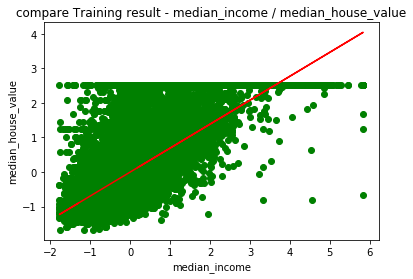

In [176]:
# let us visualize the Training set

plt.scatter(X_train_median_income, y_train, color = 'green')
plt.plot (X_train_median_income, 
          linearRegression2.predict(X_train_median_income), color = 'red')
plt.title ('compare Training result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

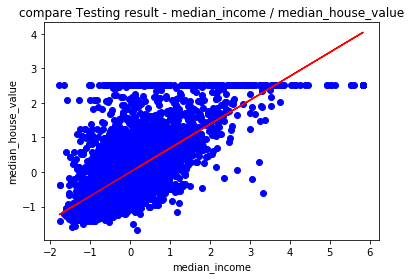

In [174]:
# let us visualize the Testing set

plt.scatter(X_test_median_income, y_test, color = 'blue')
plt.plot (X_train_median_income, 
          linearRegression2.predict(X_train_median_income), color = 'red')
plt.title ('compare Testing result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

Linear Regression: RMSE=36.43% and after applying Cross validation R2=40.44%
Ridge Regression: R2=40.22%
DecisionTree Regressor: RMSE=33.97%
RandomForest Regression: RMSE=17.62%
    
RidgeRegressor performed better for this dataset.

RMSE value of Linear Regression with one independent variable is 53.90%